# RMS Crime Incidents

In [1]:
import geopandas as gpd

# from features.income import Income
from features.violence_calls import ViolenceCalls
# from features.households import Households
# from features.population import Population
# from features.population_density import PopulationDensity
# from features.feature_constructor import Feature
# from features.out_of_state_rental_ownership import OutOfStateRentalOwnership
# from features.ddot_bus_stops import DDotBusStops
# from features.smart_bus_stops import SmartBusStops
# from features.rental_statuses import RentalStatuses
# from features.project_green_light_locations import ProjectGreenlightLocations
from features.rms_crime import RmsCrime
# from util_detroit import concatenate_features

from detroit_geos import get_detroit_census_geos, get_detroit_boundaries

# import patsy
# from patsy import dmatrices, dmatrix
# import statsmodels.api as sm
# import statsmodels.formula.api as smf
# import seaborn as sns
# from sklearn.impute import SimpleImputer

In [2]:
ViolenceCalls().cache_features()

Data not yet loaded, loading all data
Loaded 371,176 rows of data
Data not yet cleansed, cleaning
clean data has 366419 rows
cleansed data validator: geo_id looks good
Generate index not run, or was run on the wrong grain. Creating index on block grain
Generate index not run, or was run on the wrong grain. Creating index on block group grain
Generate index not run, or was run on the wrong grain. Creating index on tract grain
wrote features to cache/ViolenceCalls_2010.pkl


In [1]:
blocks = get_detroit_census_geos(decennial_census_year=2010,target_geo_grain='block',).set_index('geo_id')
tracts = get_detroit_census_geos(decennial_census_year=2010,target_geo_grain='tract',).set_index('geo_id')
detroit = get_detroit_boundaries()

In [7]:
f = RmsCrime()
# f.load_data()
# f.cleanse_data()

v = ViolenceCalls(decennial_census_year=2010)

<AxesSubplot:>

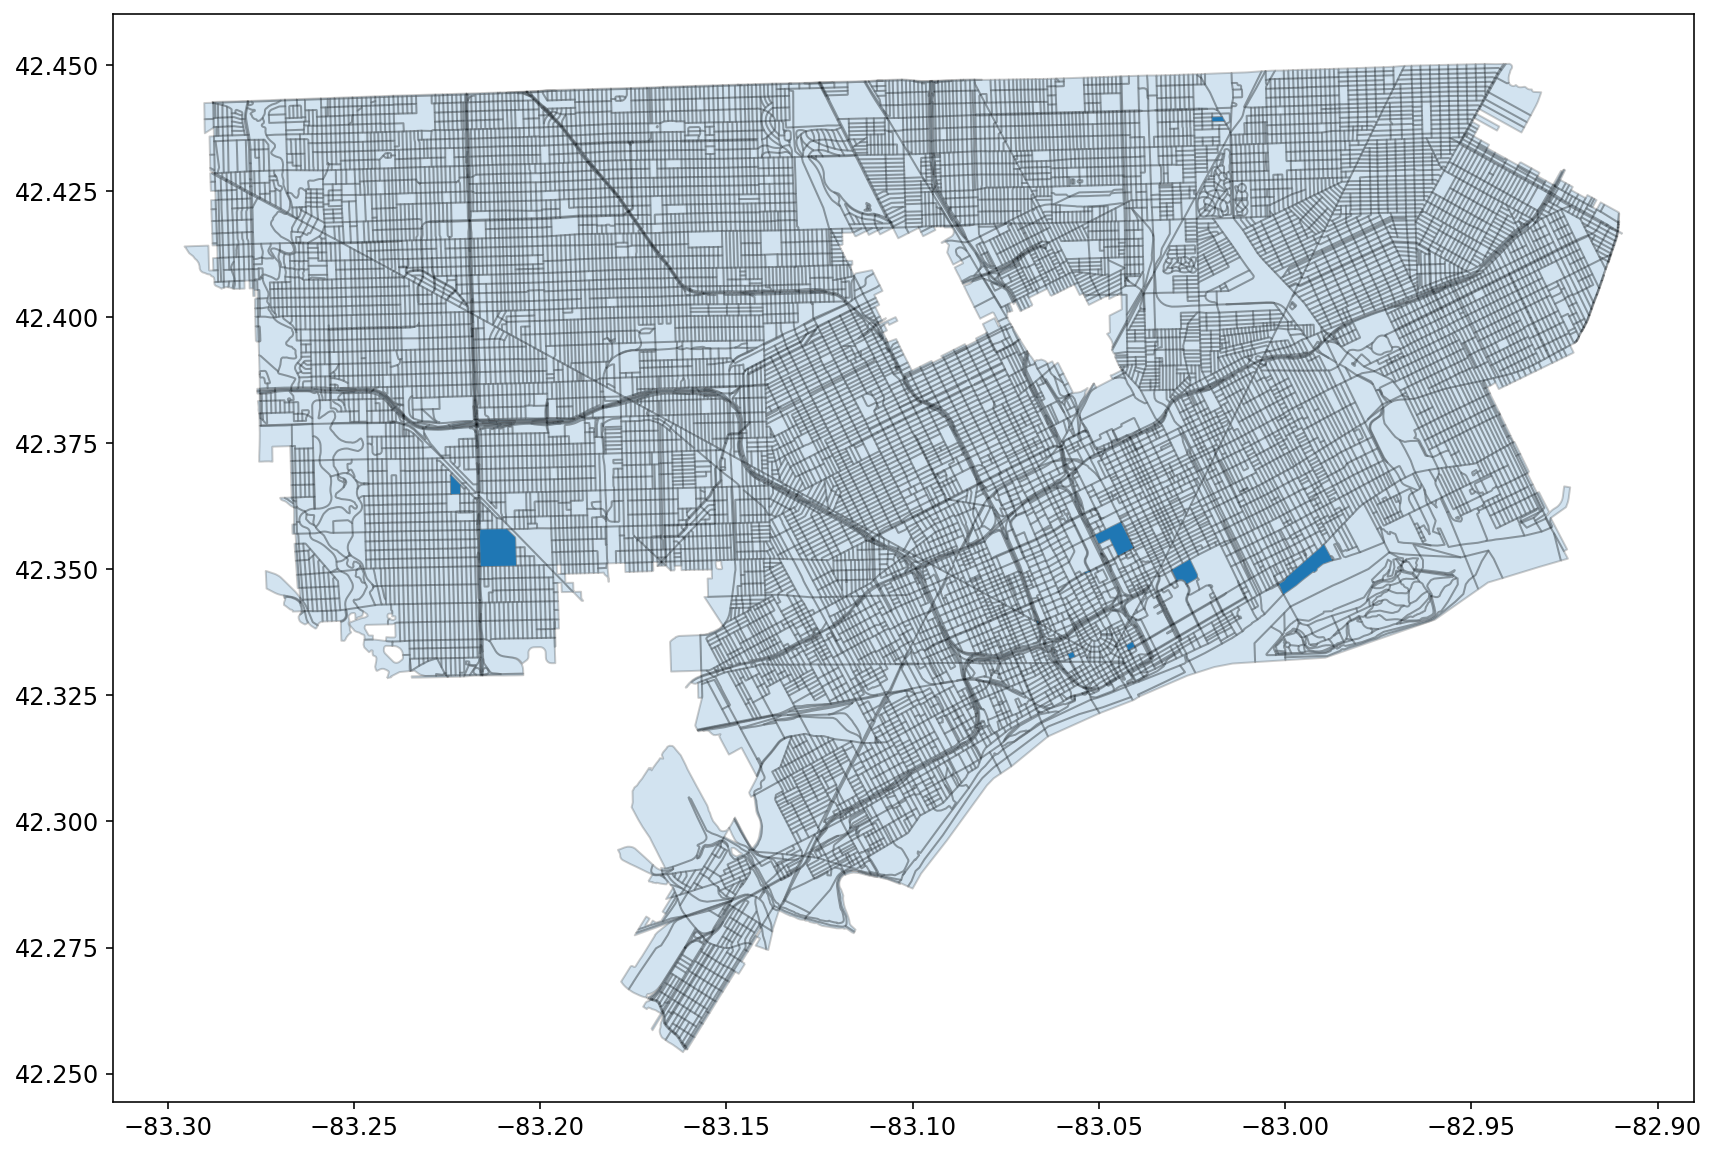

In [110]:
fig, ax = plt.subplots(1,1,figsize=(20,10))
blocks.plot(ax=ax,alpha=0.2,edgecolor='k')
df.sort_values('rms_crime').tail(10).plot(ax=ax)

In [5]:
tracts

,geometry,block_id
geo_id,,
2.616350e+10,"POLYGON ((-82.95578 42.43558, -82.95580 42.436...",2.616350e+14
2.616350e+10,"POLYGON ((-82.97099 42.44526, -82.97078 42.445...",2.616350e+14
2.616350e+10,"POLYGON ((-82.97690 42.43628, -82.97648 42.436...",2.616350e+14
2.616350e+10,"POLYGON ((-82.98668 42.42144, -82.98621 42.422...",2.616350e+14
2.616350e+10,"POLYGON ((-82.97490 42.42227, -82.97493 42.423...",2.616350e+14
...,...,...
2.616399e+10,"POLYGON ((-83.07702 42.31656, -83.07719 42.316...",2.616399e+14
2.616399e+10,"POLYGON ((-82.94815 42.34612, -82.94811 42.346...",2.616399e+14
2.616399e+10,"MULTIPOLYGON (((-83.11944 42.27917, -83.11885 ...",2.616399e+14


In [24]:
df.head()

,violence_calls,rms_crime,geometry
2.616350e+10,0.006173,0.005481,None
2.616350e+10,0.006384,0.005345,None
2.616350e+10,0.005328,0.005997,None
2.616350e+10,0.002817,0.002808,None
2.616350e+10,0.003966,0.003834,None


In [28]:
df.index.max()

261639859001020.0

In [27]:
pd.merge(df,tracts,how='outer',left_index=True,right_index=True)

,violence_calls,rms_crime,geometry_x,geometry_y,block_id
2.616350e+10,0.006173,0.005481,None,"POLYGON ((-82.95578 42.43558, -82.95580 42.436...",2.616350e+14
2.616350e+10,0.006384,0.005345,None,"POLYGON ((-82.97099 42.44526, -82.97078 42.445...",2.616350e+14
2.616350e+10,0.005328,0.005997,None,"POLYGON ((-82.97690 42.43628, -82.97648 42.436...",2.616350e+14
2.616350e+10,0.002817,0.002808,None,"POLYGON ((-82.98668 42.42144, -82.98621 42.422...",2.616350e+14
2.616350e+10,0.003966,0.003834,None,"POLYGON ((-82.97490 42.42227, -82.97493 42.423...",2.616350e+14
...,...,...,...,...,...
2.616399e+14,NaN,NaN,"POLYGON ((-83.04712 42.36427, -83.04970 42.363...",None,NaN
2.616399e+14,NaN,NaN,"POLYGON ((-83.04923 42.36264, -83.04970 42.363...",None,NaN
2.616399e+14,NaN,NaN,"POLYGON ((-83.05090 42.36204, -83.05101 42.362...",None,NaN
2.616399e+14,NaN,NaN,"POLYGON ((-83.05069 42.36485, -83.05232 42.364...",None,NaN


In [39]:
t = gpd.GeoDataFrame(df)
type(t.geometry)

geopandas.geoseries.GeoSeries

In [41]:
t.geometry.to_frame()

,geometry
2.616350e+10,"POLYGON ((-82.95578 42.43558, -82.95580 42.436..."
2.616350e+10,"POLYGON ((-82.97099 42.44526, -82.97078 42.445..."
2.616350e+10,"POLYGON ((-82.97690 42.43628, -82.97648 42.436..."
2.616350e+10,"POLYGON ((-82.98668 42.42144, -82.98621 42.422..."
2.616350e+10,"POLYGON ((-82.97490 42.42227, -82.97493 42.423..."
...,...
2.616399e+10,"POLYGON ((-83.07702 42.31656, -83.07719 42.316..."
2.616399e+10,"POLYGON ((-82.94815 42.34612, -82.94811 42.346..."
2.616399e+10,"MULTIPOLYGON (((-83.11944 42.27917, -83.11885 ..."
2.616399e+10,"POLYGON ((-83.16469 42.29031, -83.16527 42.290..."


In [40]:
isinstance(t.geometry,gpd.GeoSeries)

True

In [42]:
# del attach_polygons
from detroit_geos import attach_polygons
attach_polygons(df.violence_calls,2010,tracts)

,violence_calls,geometry
2.616350e+10,0.006173,"POLYGON ((-82.95578 42.43558, -82.95580 42.436..."
2.616350e+10,0.006384,"POLYGON ((-82.97099 42.44526, -82.97078 42.445..."
2.616350e+10,0.005328,"POLYGON ((-82.97690 42.43628, -82.97648 42.436..."
2.616350e+10,0.002817,"POLYGON ((-82.98668 42.42144, -82.98621 42.422..."
2.616350e+10,0.003966,"POLYGON ((-82.97490 42.42227, -82.97493 42.423..."
...,...,...
2.616399e+10,0.000648,"POLYGON ((-83.07702 42.31656, -83.07719 42.316..."
2.616399e+10,0.000025,"POLYGON ((-82.94815 42.34612, -82.94811 42.346..."
2.616399e+10,0.000003,"MULTIPOLYGON (((-83.11944 42.27917, -83.11885 ..."
2.616399e+10,0.000000,"POLYGON ((-83.16469 42.29031, -83.16527 42.290..."


You may want to rerun self.cache_features()


0.9164442412644385


[Text(0.5, 1.0, 'rms crime')]

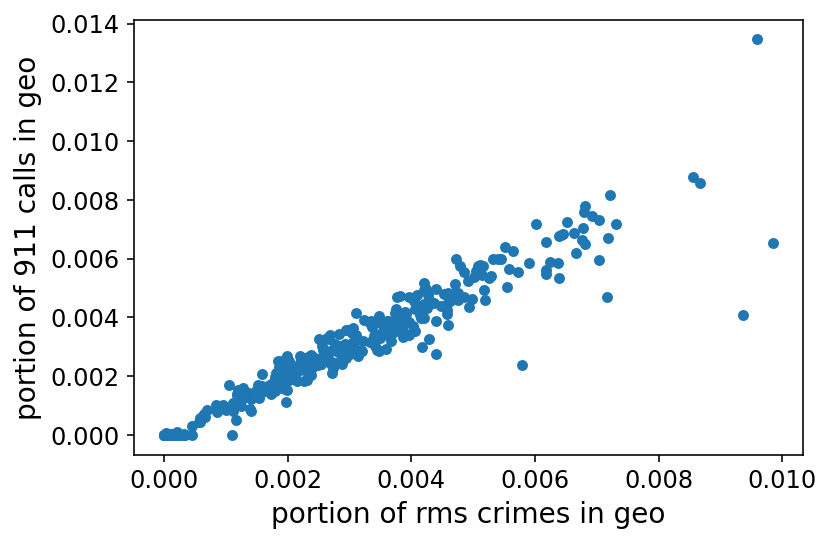

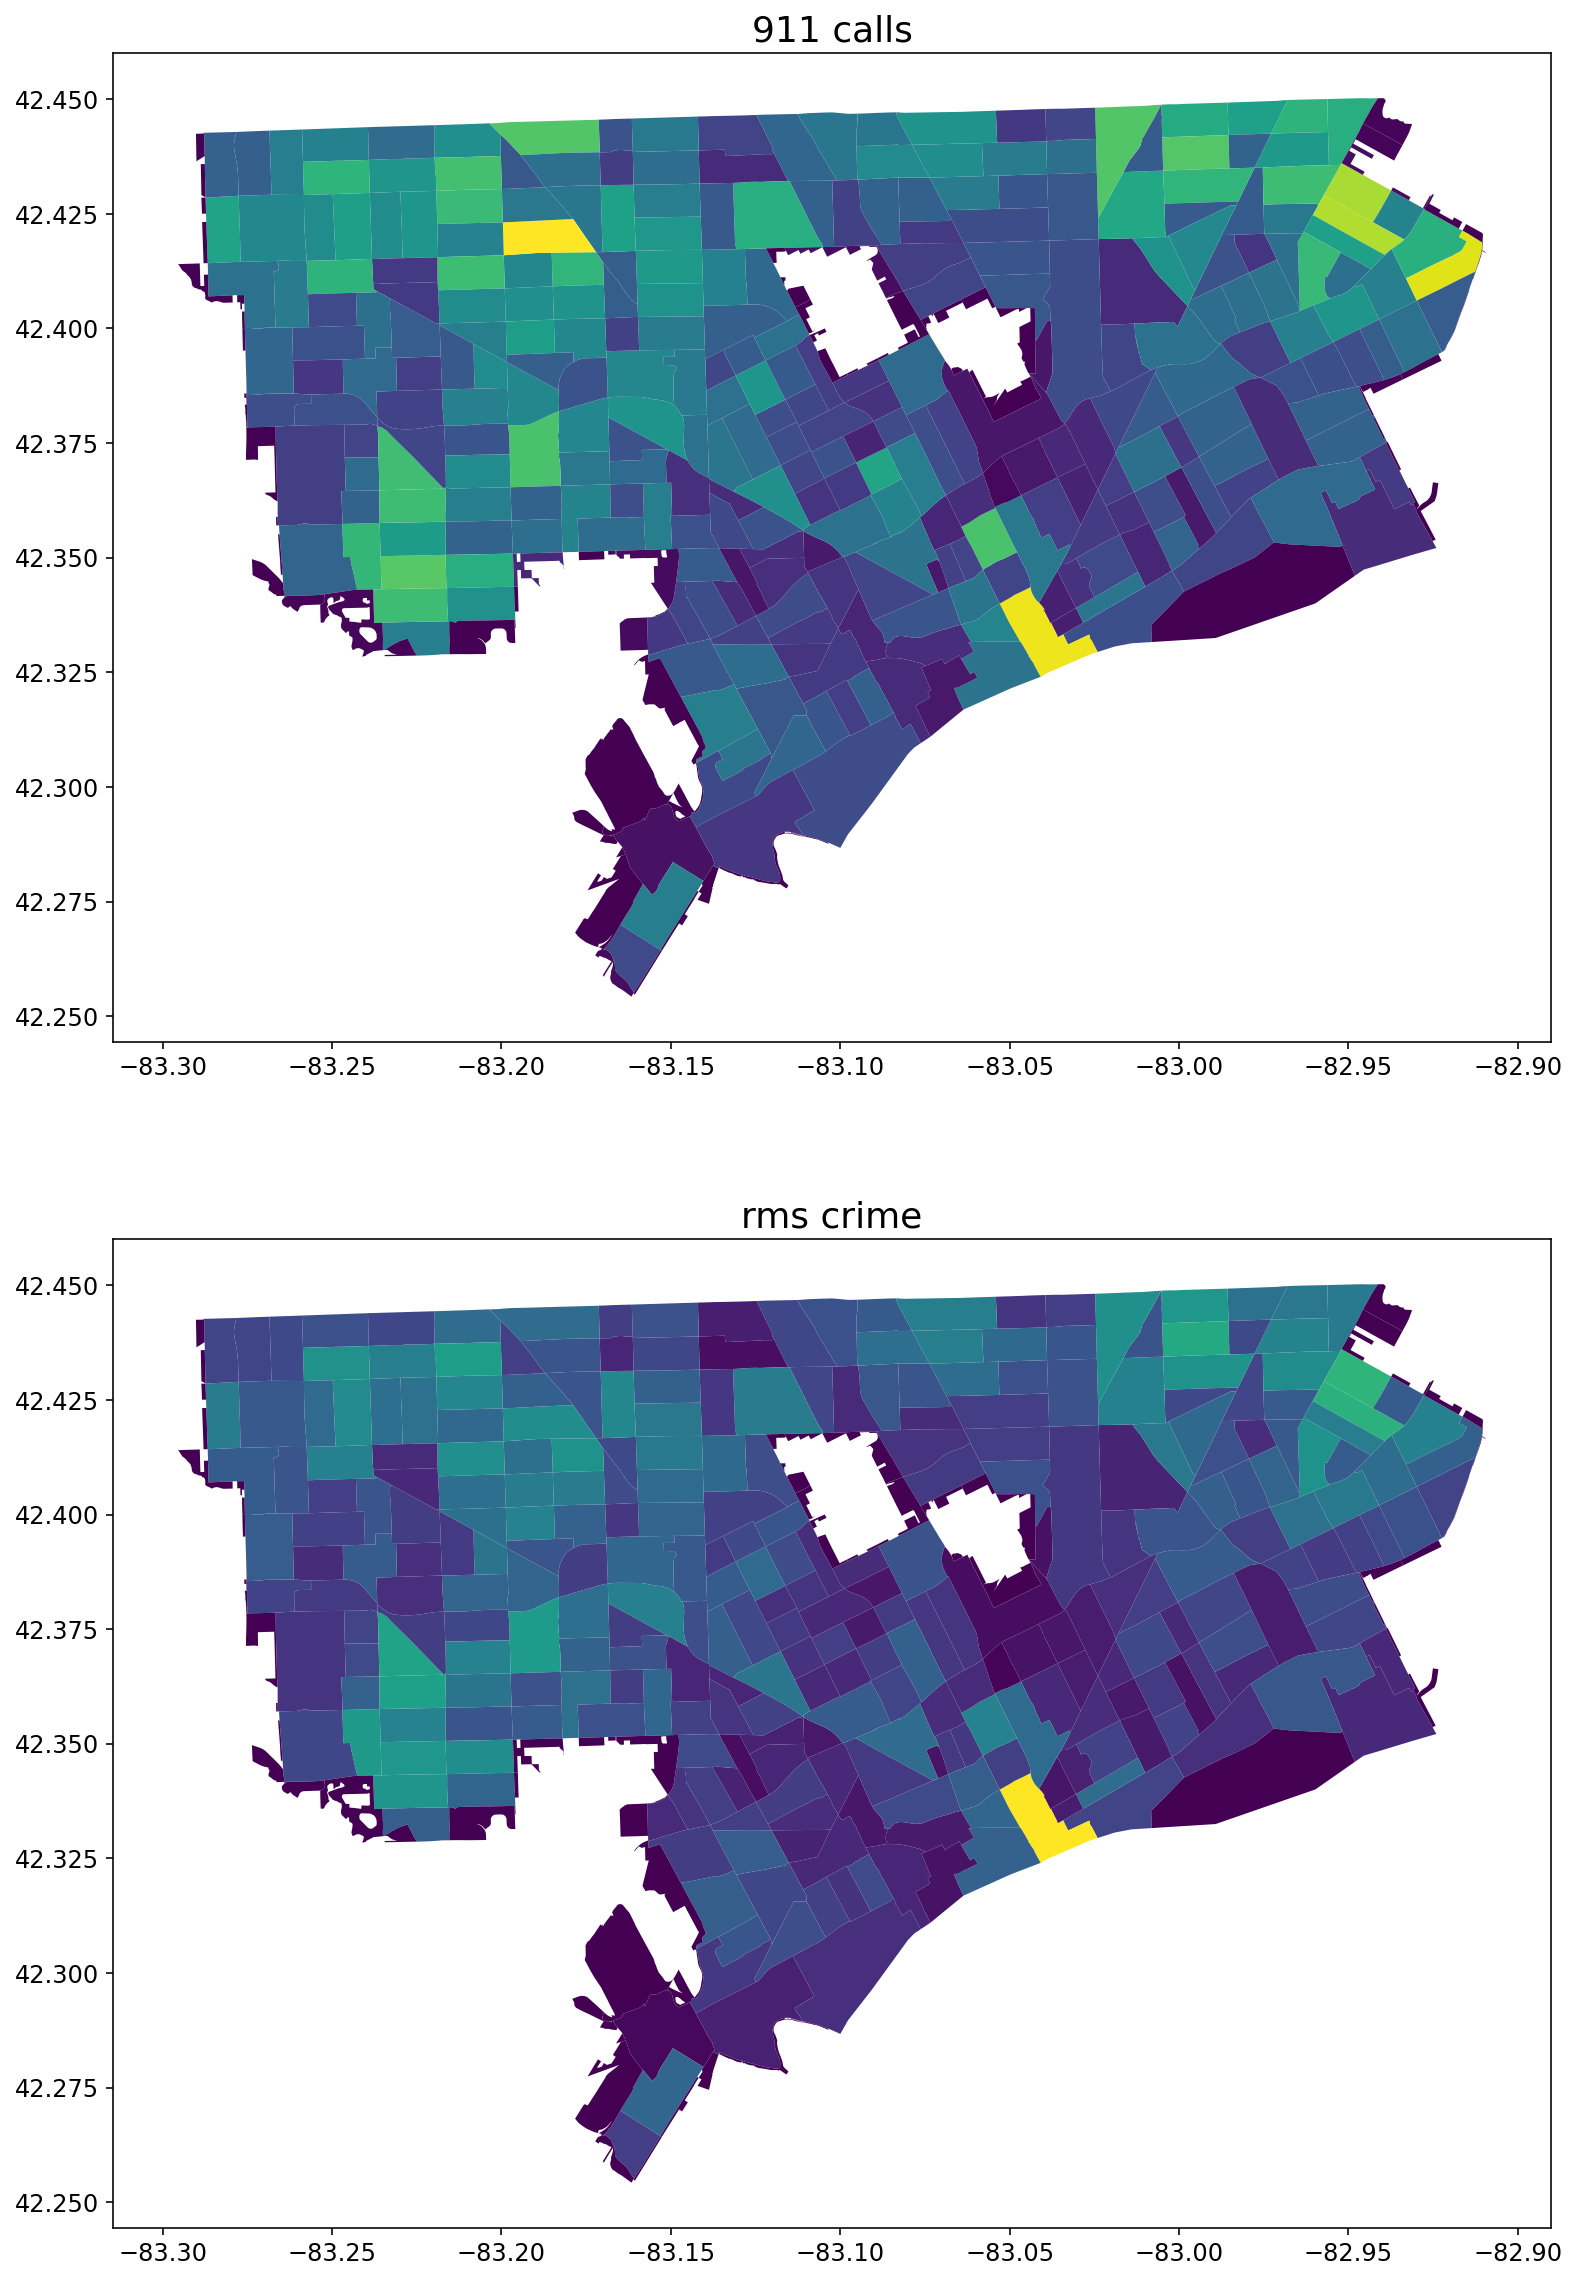

In [29]:
target_geo_dimension = "tract"
df = pd.concat(
    (
        v.load_cached_features(target_geo_dimension),
        f.load_cached_features(target_geo_dimension),
        blocks if target_geo_dimension == 'block' else tracts,
    ),
    axis=1,
)

df.loc[:, ["violence_calls", "rms_crime"]] = df.loc[
    :, ["violence_calls", "rms_crime"]
].transform(lambda x: x / x.sum())

print((df.loc[:, ["violence_calls", "rms_crime"]].corr() ** 2).iloc[0, 1])

_ = df.loc[:, ["violence_calls", "rms_crime"]].plot(
    x="violence_calls", y="rms_crime", kind="scatter"
)
df = gpd.GeoDataFrame(df)
_ = plt.gca().set(
    xlabel="portion of rms crimes in geo", ylabel="portion of 911 calls in geo"
)

fig, ax = plt.subplots(2,1,figsize=(20,20))
df.plot('violence_calls',ax=ax[0])
df.plot('rms_crime',ax=ax[1], )
ax[0].set(title='911 calls')
ax[1].set(title='rms crime')

In [11]:
f.data.geo_id.astype(float)

0         2.616354e+14
2         2.616350e+14
3         2.616353e+14
6         2.616351e+14
7         2.616353e+14
              ...     
422023    2.616352e+14
422027    2.616351e+14
422028    2.616354e+14
422030    2.616351e+14
422032    2.616351e+14
Name: geo_id, Length: 162754, dtype: float64

In [4]:
f.cleanse_data()

clean data has 162754 rows


TypeError: ufunc 'log10' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [10]:
colnames = ['crime_id', 'report_number', 'address', 'offense_description',
       'offense_category', 'state_offense_code', 'arrest_charge',
       'charge_description', 'incident_timestamp',
       'day_of_week', 'hour_of_day', 'year', 'scout_car_area', 'precinct',
       'block_id', 'neighborhood', 'council_district', 'zip_code', 'longitude',
       'latitude', 'oid', 'geometry']
raw = gpd.read_file('RMS_Arime_Incidents/RMS_Crime_Incidents.shp',rows=sample_rows)
raw.columns = colnames
raw.head()

,crime_id,report_number,address,offense_description,offense_category,state_offense_code,arrest_charge,charge_description,incident_timestamp,day_of_week,hour_of_day,year,scout_car_area,precinct,block_id,neighborhood,council_district,zip_code,longitude,latitude,oid,geometry
0,3009618,1701040021,W 7 Mile Rd & Prest St,ROBBERY,ROBBERY,1201,12000,ROBBERY,2017-01-04,3,5,2017,1206,12,261635397002007,San Bernardo,2,48235,-83.198688,42.430457,1,POINT (-83.19869 42.43046)
1,3010068,1701050039,Piedmont St & Elmira St,ARSON,ARSON,2099,20000,ARSON,2017-01-05,4,9,2017,0607,06,261635468003000,Franklin Park,7,48228,-83.228911,42.369620,2,POINT (-83.22891 42.36962)
2,3021098,1702030283,Conner St & Engleside St,ROBBERY,ROBBERY,1201,12000,ROBBERY,2017-02-04,5,22,2017,0908,09,261635048001000,Airport Sub,4,48205,-83.009396,42.415070,3,POINT (-83.00940 42.41507)
3,3021416,1702040249,Scotten St & Milford St,ROBBERY,ROBBERY,1201,12000,ROBBERY,2017-02-05,6,23,2017,1009,10,261635272001021,Midwest,5,48210,-83.112285,42.349950,4,POINT (-83.11229 42.34995)
4,3021501,1702050013,W Chicago St & Carlin Ave,ARSON,ARSON,2099,20000,ARSON,2017-02-05,7,4,2017,0207,02,261635351002016,Plymouth-Hubbell,7,48227,-83.178905,42.365775,5,POINT (-83.17890 42.36577)


<AxesSubplot:>

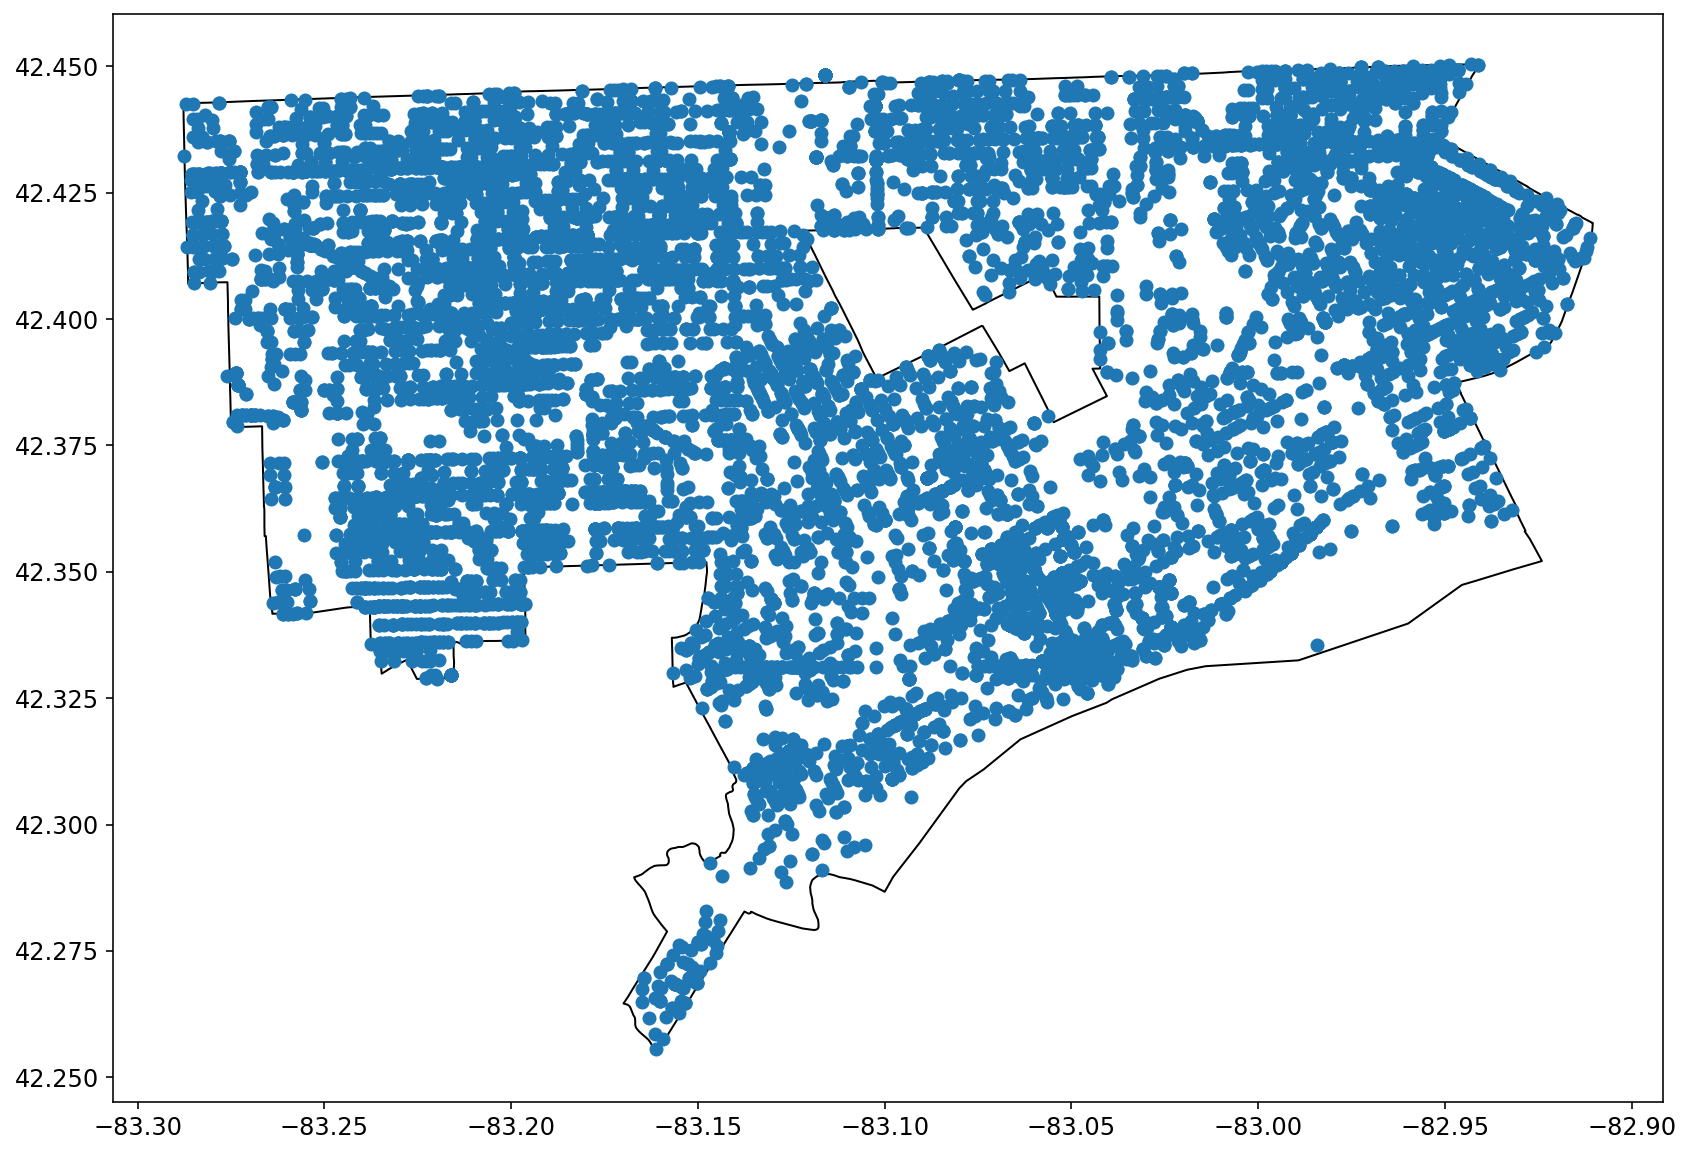

In [19]:
fig, ax = plt.subplots(1,1,figsize=(20,10))
detroit.plot(ax=ax,facecolor='none')
raw.sample(10000).plot(ax=ax)

In [53]:
import re
whitelist_strings = [
    "MURDER",
    "HOMICIDE",
    "CSC",
    "ROBBERY",
    "CARJACKING",
    "ASSAULT",
    "SHOOTING",
    "WEAPONS OFFENSE",
]
expr = re.compile("|".join(whitelist_strings))

In [56]:
df = raw.loc[raw.assign(offense_description=lambda x: x.offense_description.fillna('')).offense_description.str.contains(expr)]

In [58]:
df.columns

Index(['crime_id', 'report_number', 'address', 'offense_description',
       'offense_category', 'state_offense_code', 'arrest_charge',
       'charge_description', 'incident_timestamp', 'day_of_week',
       'hour_of_day', 'year', 'scout_car_area', 'precinct', 'block_id',
       'neighborhood', 'council_district', 'zip_code', 'longitude', 'latitude',
       'oid', 'geometry'],
      dtype='object')

In [57]:
df.shape

(162754, 22)

In [51]:
raw.groupby(['arrest_charge','offense_description']).oid.count().sort_values(ascending=False).head(100).to_clipboard()

In [50]:
raw.query("'12000' == arrest_charge").state_offense_code.value_counts()

1201    10534
Name: state_offense_code, dtype: int64

In [27]:
raw.query("offense_description == 'ASSAULT AND BATTERY/SIMPLE ASSAULT'").iloc[0]

crime_id                                                    3000063
report_number                                            1612060065
address                             Longfellow St & Rosa Parks Blvd
offense_description              ASSAULT AND BATTERY/SIMPLE ASSAULT
offense_category                                            ASSAULT
state_offense_code                                             1301
arrest_charge                                                 13001
charge_description               ASSAULT AND BATTERY/SIMPLE ASSAULT
incident_timestamp                                       2016-12-06
day_of_week                                                       1
hour_of_day                                                      23
year                                                           2016
scout_car_area                                                 1005
precinct                                                         10
block_id                                        

In [8]:
gpd.read_file('RMS_Crime_Incidents/RMS_Crime_Incidents.shp',)

In [6]:
raw.loc[0]

crime_id                                           3009618
report_num                                      1701040021
address                             W 7 Mile Rd & Prest St
offense_de                                         ROBBERY
offense_ca                                         ROBBERY
state_offe                                            1201
arrest_cha                                           12000
charge_des                                         ROBBERY
incident_t                                      2017-01-04
day_of_wee                                               3
hour_of_da                                               5
year                                                  2017
scout_car_                                            1206
precinct                                                12
block_id                                   261635397002007
neighborho                                    San Bernardo
council_di                                              

# Households

In [52]:
household_colmap = {'id':'geo_id','Estimate!!Households!!Total': 'households','Estimate!!Married-couple families!!Total': 'married_families'}
households = pd.read_csv(
    "productDownload_2022-02-15T172253/ACSST5Y2019.S1901_data_with_overlays_2022-02-15T172238.csv",
    skiprows=[0],
    usecols=household_colmap.keys()
).rename(columns=household_colmap)

In [65]:
from features.households import Households

households = Households()

feat_households = households.construct_feature('tract')

Data not yet loaded, loading all data
Data not yet cleansed, cleaning
clean data has 611 rows
cleansed data validator: geo_id looks good
Generate index not run, or was run on the wrong grain. Creating index on tract grain


In [66]:
feat_households

,households,married_families,non_family_households
tract,,,
2.616350e+10,1438,249,674
2.616350e+10,1088,190,370
2.616350e+10,811,61,491
2.616350e+10,375,45,140
2.616350e+10,506,61,274
...,...,...,...
2.616399e+10,166,16,141
2.616399e+10,0,0,0
2.616399e+10,0,0,0


In [51]:
household_descriptions = pd.read_csv(
    "productDownload_2022-02-15T172253/ACSST5Y2019.S1901_data_with_overlays_2022-02-15T172238.csv",
    skiprows=[0],
)

[x for x in household_descriptions.columns if ('Margin' not in x) and ('$' not in x)]

['id',
 'Geographic Area Name',
 'Estimate!!Households!!Total',
 'Estimate!!Households!!Median income (dollars)',
 'Estimate!!Households!!Mean income (dollars)',
 'Estimate!!Households!!PERCENT ALLOCATED!!Household income in the past 12 months',
 'Estimate!!Households!!PERCENT ALLOCATED!!Family income in the past 12 months',
 'Estimate!!Households!!PERCENT ALLOCATED!!Nonfamily income in the past 12 months',
 'Estimate!!Families!!Total',
 'Estimate!!Families!!Median income (dollars)',
 'Estimate!!Families!!Mean income (dollars)',
 'Estimate!!Families!!PERCENT ALLOCATED!!Household income in the past 12 months',
 'Estimate!!Families!!PERCENT ALLOCATED!!Family income in the past 12 months',
 'Estimate!!Families!!PERCENT ALLOCATED!!Nonfamily income in the past 12 months',
 'Estimate!!Married-couple families!!Total',
 'Estimate!!Married-couple families!!Median income (dollars)',
 'Estimate!!Married-couple families!!Mean income (dollars)',
 'Estimate!!Married-couple families!!PERCENT ALLOCATE